C:\Users\souni\AppData\Local\Temp\ipykernel_8500\1515375697.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date


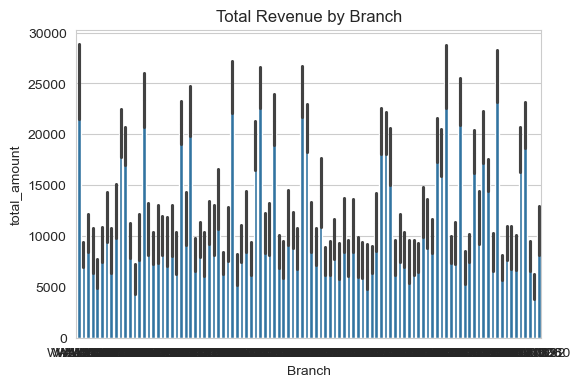

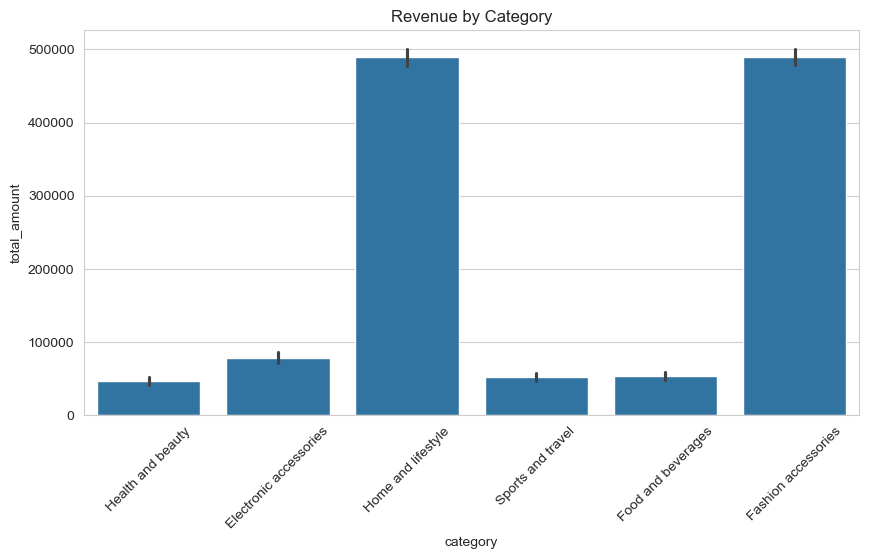

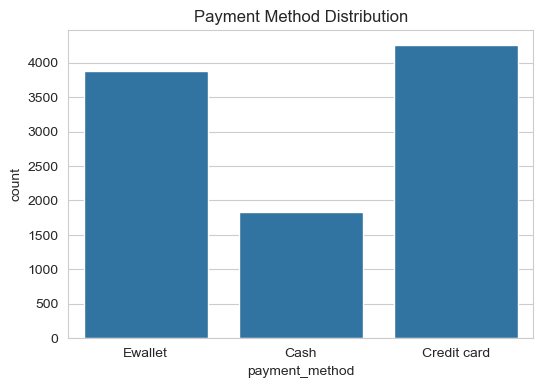

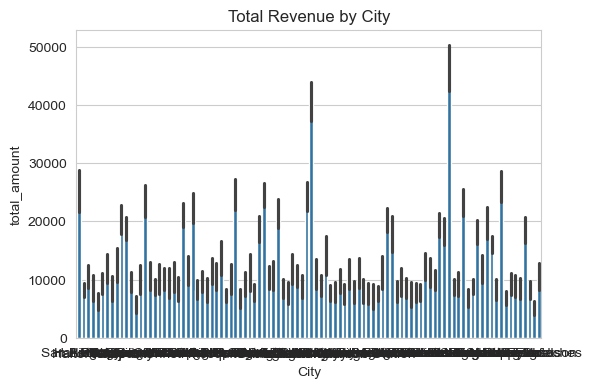

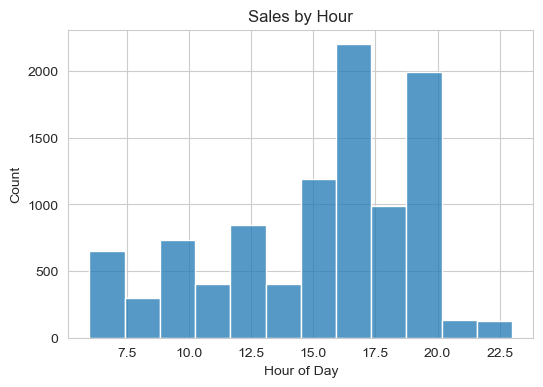

✅ Project completed successfully!


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import os
import datetime

file_path = "data/Walmart.csv"
df = pd.read_csv(file_path)

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date
df['quantity'] = df['quantity'].astype(int)

currency_cols = ['unit_price']
for col in currency_cols:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

df['total_amount'] = df['unit_price'] * df['quantity']

os.makedirs("output", exist_ok=True)
df.to_csv("output/walmart_cleaned_dataset.csv", index=False)

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="sss123SSS",
    database="st_project_1"
)
cursor = conn.cursor()

cursor.execute("""
    CREATE TABLE IF NOT EXISTS walmart_dataset (
        invoice_id VARCHAR(30),
        Branch VARCHAR(10),
        City VARCHAR(30),
        category VARCHAR(50),
        unit_price FLOAT,
        quantity INT,
        date DATE,
        time TIME,
        payment_method VARCHAR(30),
        rating FLOAT,
        profit_margin FLOAT,
        total_amount FLOAT
    );
""")

def convert_for_mysql(row):
    row = list(row)
    row[6] = row[6] if isinstance(row[6], datetime.date) else None  # date
    row[7] = row[7] if isinstance(row[7], str) else None  # time
    return tuple(row)

data_tuples = [convert_for_mysql(x) for x in df.values]
sql_query = "INSERT INTO walmart_dataset VALUES (" + ",".join(["%s"] * len(df.columns)) + ")"
for row in data_tuples:
    cursor.execute(sql_query, row)

conn.commit()
cursor.close()
conn.close()

sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x='Branch', y='total_amount', data=df, estimator=sum)
plt.title("Total Revenue by Branch")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='category', y='total_amount', data=df, estimator=sum)
plt.title("Revenue by Category")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='payment_method', data=df)
plt.title("Payment Method Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='City', y='total_amount', data=df, estimator=sum)
plt.title("Total Revenue by City")
plt.show()

plt.figure(figsize=(6,4))
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.hour
sns.histplot(df['hour'], bins=12, kde=False)
plt.title("Sales by Hour")
plt.xlabel("Hour of Day")
plt.show()

print("✅ Project completed successfully!")


In [9]:
print(df['date'].head())


0    2019-05-01
1    2019-08-03
2    2019-03-03
3    2019-01-27
4    2019-08-02
Name: date, dtype: object
